In [428]:
#

In [429]:
from tokenize import Number
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

import time
from datetime import datetime
from datetime import timedelta
import math

In [430]:
#datos para la conexion a la base de datos
hostname = '82.180.175.58'
username = 'u813407238_lora'
password = 'Seguimiento_lora_123'
database = 'u813407238_seguimiento'

In [431]:
import MySQLdb
# inicialmente hace la conexion con la base de datos
myConnection = MySQLdb.connect( host=hostname, user=username, passwd=password, db=database )
import pandas as pd
# genera la lectura de la base de datos
dataset= pd.read_sql("SELECT * FROM LoRaWAN_messages_calle_5 order by id",myConnection)
print("Va a imprimir el dataset leido de la BD...")
#print(dataset)
#dataset[['COL 3','COL 4']].dtypes
#dataset = pd.DataFrame()
#dataset['T'] = dataset['date'] +' '+ dataset['time']
#dataset['date hour'] = dataset['date'] +' '+ dataset['hour']
#dataset = pd.to_datetime(dataset['date'] + dataset['time'])
print("Va a imprimir date y time...")

C:\Users\ander\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


Va a imprimir el dataset leido de la BD...
Va a imprimir date y time...


In [432]:
#pip install mysqlclient

In [433]:
#dataset.head

In [434]:
dataset.drop(index=dataset[dataset['latitude']=='0'].index, inplace=True)

In [435]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 17 to 278
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         262 non-null    int64          
 1   dev_id     262 non-null    object         
 2   date       262 non-null    object         
 3   hour       262 non-null    timedelta64[ns]
 4   latitude   262 non-null    object         
 5   longitude  262 non-null    object         
 6   speed      262 non-null    object         
 7   accx       262 non-null    object         
 8   accy       262 non-null    object         
 9   accz       262 non-null    object         
 10  gyrox      262 non-null    object         
 11  gyroy      262 non-null    object         
 12  gyroz      262 non-null    object         
 13  SF         262 non-null    object         
 14  BW         262 non-null    object         
 15  CR         262 non-null    object         
dtypes: int64(1), object(14), 

In [436]:
time = dataset['hour']

In [437]:
dataset

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
17,18,tarjeta2-cubecell,2022-08-31,0 days 13:47:22,2.4494545,-76.6269796,0.62968,-0.1043366,-0.7579422,9.8896343,0.2024117,-0.2121214,0.0974049,7,125000,4/5
18,19,tarjeta2-cubecell,2022-08-31,0 days 13:47:33,2.4494231,-76.6269756,0,-0.1043366,-0.8920633,9.8225738,-0.041863,0.0474205,0.2042751,7,125000,4/5
19,20,tarjeta2-cubecell,2022-08-31,0 days 13:47:43,2.4493666,-76.6269073,0,-0.1211018,-0.7986575,9.7770684,0.2482132,-0.349526,0.0821378,7,125000,4/5
20,21,tarjeta2-cubecell,2022-08-31,0 days 13:47:54,2.4493663,-76.6268878,0,-0.1546321,-0.8369779,9.7722784,0.2482132,0.077955,0.1279393,7,125000,4/5
21,22,tarjeta2-cubecell,2022-08-31,0 days 13:48:06,2.4493705,-76.6268905,0,-0.1234968,-0.856138,9.8537091,0.324549,0.1084892,0.1890079,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,275,tarjeta2-cubecell,2022-08-31,0 days 14:36:37,2.4503646,-76.6269323,24.13156,1.2033439,-2.9853105,7.638316,-0.4846112,-2.5938007,-2.5896177,7,125000,4/5
275,276,tarjeta2-cubecell,2022-08-31,0 days 14:36:48,2.4502795,-76.6266823,14.00112,-0.1091267,-6.2257719,11.5829132,-0.3930082,-8.9449462,13.8378629,7,125000,4/5
276,277,tarjeta2-cubecell,2022-08-31,0 days 14:37:26,2.4495106,-76.6269685,1.0186,-0.3198884,-3.7301616,10.454859,-0.0876646,-8.9449462,6.4027485,7,125000,4/5
277,278,tarjeta2-cubecell,2022-08-31,0 days 14:37:38,2.4494831,-76.6269721,0,2.4224089,-1.6872098,9.0681427,1.1642438,4.0321536,-1.6735874,7,125000,4/5


In [438]:
dataset['latitude']=dataset['latitude'].astype('float64')
dataset['longitude']=dataset['longitude'].astype('float64')

In [439]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 17 to 278
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         262 non-null    int64          
 1   dev_id     262 non-null    object         
 2   date       262 non-null    object         
 3   hour       262 non-null    timedelta64[ns]
 4   latitude   262 non-null    float64        
 5   longitude  262 non-null    float64        
 6   speed      262 non-null    object         
 7   accx       262 non-null    object         
 8   accy       262 non-null    object         
 9   accz       262 non-null    object         
 10  gyrox      262 non-null    object         
 11  gyroy      262 non-null    object         
 12  gyroz      262 non-null    object         
 13  SF         262 non-null    object         
 14  BW         262 non-null    object         
 15  CR         262 non-null    object         
dtypes: float64(2), int64(1), 

In [440]:
d = pd.DataFrame()
d['latitud']=dataset['latitude']
d['longitude']=dataset['longitude']
d.to_csv('calle_5_original.csv')

In [441]:
def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
    distancia=2*R*math.asin(math.sqrt(a))
    return distancia

In [442]:
time_step = 30

In [443]:
last = int(len(dataset)/5.0)

In [444]:
set_entrenamiento = dataset[:-last]
set_validacion = dataset[-last-time_step:]

In [445]:
set_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 17 to 226
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         210 non-null    int64          
 1   dev_id     210 non-null    object         
 2   date       210 non-null    object         
 3   hour       210 non-null    timedelta64[ns]
 4   latitude   210 non-null    float64        
 5   longitude  210 non-null    float64        
 6   speed      210 non-null    object         
 7   accx       210 non-null    object         
 8   accy       210 non-null    object         
 9   accz       210 non-null    object         
 10  gyrox      210 non-null    object         
 11  gyroy      210 non-null    object         
 12  gyroz      210 non-null    object         
 13  SF         210 non-null    object         
 14  BW         210 non-null    object         
 15  CR         210 non-null    object         
dtypes: float64(2), int64(1), 

In [446]:
set_validacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 197 to 278
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         82 non-null     int64          
 1   dev_id     82 non-null     object         
 2   date       82 non-null     object         
 3   hour       82 non-null     timedelta64[ns]
 4   latitude   82 non-null     float64        
 5   longitude  82 non-null     float64        
 6   speed      82 non-null     object         
 7   accx       82 non-null     object         
 8   accy       82 non-null     object         
 9   accz       82 non-null     object         
 10  gyrox      82 non-null     object         
 11  gyroy      82 non-null     object         
 12  gyroz      82 non-null     object         
 13  SF         82 non-null     object         
 14  BW         82 non-null     object         
 15  CR         82 non-null     object         
dtypes: float64(2), int64(1), 

In [447]:
set_entrenamiento.reset_index(inplace=True, drop=True)
#set_entrenamiento

In [448]:
set_validacion.reset_index(inplace=True, drop=True)
#set_validacion

In [449]:
set_validacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         82 non-null     int64          
 1   dev_id     82 non-null     object         
 2   date       82 non-null     object         
 3   hour       82 non-null     timedelta64[ns]
 4   latitude   82 non-null     float64        
 5   longitude  82 non-null     float64        
 6   speed      82 non-null     object         
 7   accx       82 non-null     object         
 8   accy       82 non-null     object         
 9   accz       82 non-null     object         
 10  gyrox      82 non-null     object         
 11  gyroy      82 non-null     object         
 12  gyroz      82 non-null     object         
 13  SF         82 non-null     object         
 14  BW         82 non-null     object         
 15  CR         82 non-null     object         
dtypes: float64(2), int64(1), obj

In [450]:
set_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   id         210 non-null    int64          
 1   dev_id     210 non-null    object         
 2   date       210 non-null    object         
 3   hour       210 non-null    timedelta64[ns]
 4   latitude   210 non-null    float64        
 5   longitude  210 non-null    float64        
 6   speed      210 non-null    object         
 7   accx       210 non-null    object         
 8   accy       210 non-null    object         
 9   accz       210 non-null    object         
 10  gyrox      210 non-null    object         
 11  gyroy      210 non-null    object         
 12  gyroz      210 non-null    object         
 13  SF         210 non-null    object         
 14  BW         210 non-null    object         
 15  CR         210 non-null    object         
dtypes: float64(2), int64(1), o

In [451]:
x= np.column_stack((set_entrenamiento.iloc[:,[4]],set_entrenamiento.iloc[:,[5]],set_entrenamiento.iloc[:,[8]],set_entrenamiento.iloc[:,[12]]))

In [452]:
x

array([[2.4494545, -76.6269796, '-0.7579422', '0.0974049'],
       [2.4494231, -76.6269756, '-0.8920633', '0.2042751'],
       [2.4493666, -76.6269073, '-0.7986575', '0.0821378'],
       [2.4493663, -76.6268878, '-0.8369779', '0.1279393'],
       [2.4493705, -76.6268905, '-0.856138', '0.1890079'],
       [2.4493788, -76.6268981, '-0.8082376', '0.1432064'],
       [2.4493828, -76.6269026, '-0.8058426', '0.0668705'],
       [2.4493831, -76.6269031, '-0.8968533', '0.3264125'],
       [2.4493825, -76.6269033, '-0.4082694', '-0.25374'],
       [2.4493955, -76.6269605, '-3.3780937', '-40.0247306'],
       [2.4497268, -76.626825, '-4.5277031', '-9.4903812'],
       [2.4501543, -76.626585, '-3.8666777', '-17.1392364'],
       [2.4501533, -76.6259793, '0.8970162', '1.4561835'],
       [2.4498935, -76.6253315, '-0.0633865', '4.6164889'],
       [2.4499083, -76.6252643, '-2.0105374', '0.1432064'],
       [2.4499338, -76.6252716, '-1.4141776', '-0.25374'],
       [2.449941, -76.6252778, '-1.624939

In [453]:
#x[0:1,:]

In [454]:
#x[0]

In [455]:
# Normalización del set de entrenamiento
sc1 = MinMaxScaler(feature_range=(0,1))
set_entrenamiento_escalado = sc1.fit_transform(x)

In [456]:
#set_entrenamiento_latitud_escalado=x

In [457]:
#set_entrenamiento_latitud_escalado = np.array(set_entrenamiento_latitud_escalado).reshape(set_entrenamiento_latitud_escalado, ((set_entrenamiento_latitud_escalado.shape[0])/4), set_entrenamiento_latitud_escalado.shape[1], 4)

In [458]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
X_train = []
Y_train = []
m = len(set_entrenamiento_escalado)

In [459]:
for i in range(time_step,m):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train.append(set_entrenamiento_escalado[i-time_step:i,0:5])
    # Y: el siguiente dato
    Y_train.append(set_entrenamiento_escalado[i,0:5])

In [460]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [461]:
#X_train

In [462]:
#Y_train

In [463]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 4))

In [464]:
#X_train

In [465]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (100):
dim_entrada = (X_train.shape[1],4)
dim_salida = 4
na = 100

In [466]:
from keras.layers import Bidirectional

In [467]:
#Cear un contenedor usando el módulo Sequential:
modelo = Sequential()
#añadimos el modelo
#modelo.add(Bidirectional(LSTM(units=na, return_sequences=True, input_shape=dim_entrada)))
modelo.add(Bidirectional(LSTM(units=na, input_shape=dim_entrada)))
#Agregamos una capa LSTM
#modelo.add(Bidirectional(LSTM(units=na)))
#evitamos el sobreentrtenamiento con dropout
modelo.add(Dropout(0.2))
#Dense para la capa de salida
modelo.add(Dense(units=dim_salida))

In [468]:
#definimos funcion de error y el método para minimizar
modelo.compile(optimizer='RMSprop', loss='mse')

In [469]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
modelo.fit(X_train,Y_train,epochs=500,batch_size=32)
#epochs 100  batch=64 loss 0.0017
#epochs 100  batch=32 loss 0.0040
#epochs 20  batch=32 loss 0.0071

Epoch 1/500
6/6 [==============================] - 4s 12ms/step - loss: 0.1142
Epoch 2/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0467
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0379
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0309
Epoch 5/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0261
Epoch 6/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0239
Epoch 7/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0241
Epoch 8/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 9/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0203
Epoch 10/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0196
Epoch 11/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0237
Epoch 12/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0190
Epoch 13/500
6/6 [==============================]

6/6 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 205/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 206/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0095
Epoch 207/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 208/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0094
Epoch 209/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0094
Epoch 210/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 211/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0091
Epoch 212/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0099
Epoch 213/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0090
Epoch 214/500
6/6 [==============================] - 0s 12ms/step - loss: 0.0097
Epoch 215/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0093
Epoch 216/500
6/6 [=======================

6/6 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 407/500
6/6 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 408/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 409/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 410/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0077
Epoch 411/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0081
Epoch 412/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 413/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 414/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 415/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0075
Epoch 416/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0074
Epoch 417/500
6/6 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 418/500
6/6 [=======================

In [470]:
#X_train.shape

In [471]:
#x_test_latitud = set_validacion.iloc[:,4:5]
x_test= np.column_stack((set_validacion.iloc[:,[4]],set_validacion.iloc[:,[5]],set_validacion.iloc[:,[8]],set_validacion.iloc[:,[12]]))

In [472]:
x_test

array([[2.4519091, -76.630428, '-6.0006401', '4.5096187'],
       [2.4522985, -76.6310975, '-3.6271758', '-3.5972514'],
       [2.452294, -76.6313441, '-3.3780937', '2.8302292'],
       [2.4519438, -76.6306508, '-0.848953', '3.5630536'],
       [2.4517023, -76.6301863, '-2.678748', '2.021069'],
       [2.4513236, -76.6294558, '-0.5759207', '-1.7041217'],
       [2.450979, -76.6288253, '-3.8714677', '-1.7041217'],
       [2.450581, -76.6280241, '3.955456', '3.2271759'],
       [2.4504063, -76.6272296, '0.0012789', '-4.5285491'],
       [2.4503965, -76.6264573, '-0.8633231', '-1.0018316'],
       [2.4502026, -76.625647, '4.3530292', '4.5859546'],
       [2.4499473, -76.6252015, '-5.3515898', '9.8073282'],
       [2.4495839, -76.624617, '-0.5687357', '-6.101068'],
       [2.4491876, -76.6240206, '-5.9048393', '-2.5132822'],
       [2.4487598, -76.6233028, '-1.1148001', '-0.3300759'],
       [2.4483785, -76.622713, '-3.1936772', '4.5706872'],
       [2.4481651, -76.622198, '-1.10043', '32.

In [473]:
array_latitud = []
for x in range(len(x_test)):
    array_latitud.append(x_test[x,0])

In [474]:
#array_latitud

In [475]:
array_longitud = []
for x in range(len(x_test)):
    array_longitud.append(x_test[x,1])

In [476]:
#array_longitud

In [477]:
#sc2 = MinMaxScaler(feature_range=(0,1))
x_test_n = sc1.transform(x_test)
#x_test_n

In [478]:
x_test_n.shape

(82, 4)

In [479]:
#Obtenemos bloques de 60 datos
X_test = []
for i in range(time_step,len(x_test_n)):
    X_test.append(x_test_n[i-time_step:i,0:5])

In [480]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 4)

In [481]:
#X_test

In [482]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],4))

In [483]:
#X_test

In [484]:
#Predecimos y normalizamos
prediccion = modelo.predict(X_test)

2/2 [==============================] - 1s 4ms/step


In [485]:
prediccion

array([[ 8.76578987e-01,  1.93823278e-02,  4.71314728e-01,
         5.30069411e-01],
       [ 9.13672030e-01, -4.62339818e-03,  5.64754605e-01,
         5.43390632e-01],
       [ 9.08658087e-01,  4.11525369e-04,  6.93135977e-01,
         5.67705631e-01],
       [ 9.20198500e-01, -9.66404378e-03,  6.90229416e-01,
         5.74774504e-01],
       [ 9.15674508e-01, -1.96184069e-02,  6.22656822e-01,
         5.81454635e-01],
       [ 7.92863071e-01,  8.66637528e-02,  5.57347178e-01,
         5.84609985e-01],
       [ 7.05453694e-01,  1.71255827e-01,  5.62964797e-01,
         5.75590611e-01],
       [ 6.51849508e-01,  2.47964725e-01,  6.17311597e-01,
         5.23759484e-01],
       [ 5.96572578e-01,  3.22252691e-01,  6.20861530e-01,
         5.10281563e-01],
       [ 5.62572241e-01,  3.92193079e-01,  5.73184609e-01,
         4.92005914e-01],
       [ 5.24623871e-01,  4.68854547e-01,  5.25502503e-01,
         4.69939172e-01],
       [ 3.92841756e-01,  6.34497821e-01,  5.50963163e-01,
      

In [486]:
#prediccion[0][1]

In [487]:
'''nw = list()
for x in range(0,len(prediccion)):
    new_item = list()
    new_item.append(prediccion, [[0],[0]], axis=1)
    nw.append(new_item)
nw = np.array(nw)'''

'nw = list()\nfor x in range(0,len(prediccion)):\n    new_item = list()\n    new_item.append(prediccion, [[0],[0]], axis=1)\n    nw.append(new_item)\nnw = np.array(nw)'

In [488]:
#nw

In [489]:
prediccion = sc1.inverse_transform(prediccion)
prediccion.shape

(52, 4)

In [490]:
X_test.shape

(52, 30, 4)

In [491]:
prediccion

array([[  2.451907  , -76.631256  ,  -2.2464654 ,  -1.7302508 ],
       [  2.4520664 , -76.631485  ,  -1.0800701 ,  -0.76786894],
       [  2.452045  , -76.63144   ,   0.5224942 ,   0.9887506 ],
       [  2.4520946 , -76.63153   ,   0.48621204,   1.4994361 ],
       [  2.4520752 , -76.63162   ,  -0.35728595,   1.9820373 ],
       [  2.4515474 , -76.63063   ,  -1.1725359 ,   2.2099934 ],
       [  2.4511716 , -76.62985   ,  -1.1024121 ,   1.5583951 ],
       [  2.450941  , -76.62914   ,  -0.42400956,  -2.186107  ],
       [  2.4507036 , -76.628456  ,  -0.3796963 ,  -3.1598096 ],
       [  2.4505575 , -76.627815  ,  -0.97483975,  -4.4801207 ],
       [  2.4503942 , -76.6271    ,  -1.570048  ,  -6.074316  ],
       [  2.449828  , -76.62556   ,  -1.2522266 ,  -1.7165618 ],
       [  2.449726  , -76.625015  ,  -1.5548153 ,  -1.6831249 ],
       [  2.4497664 , -76.624855  ,  -2.055942  ,   0.46395823],
       [  2.4497464 , -76.62491   ,  -2.8237855 ,  -0.31201717],
       [  2.4497306 , -76

In [492]:
calle_5 = pd.DataFrame(prediccion[:,0:2])

In [493]:
calle_5.to_csv('calle_5.csv')

In [494]:
array_latitud_p = []
for x in range(len(prediccion)):
    array_latitud_p.append(prediccion[x,0])

In [495]:
array_longitud_p = []
for x in range(len(prediccion)):
    array_longitud_p.append(prediccion[x,1])

In [496]:
#array_latitud_p

In [497]:
#array_longitud_p

In [498]:
# Funciones auxiliares
def graficar_predicciones(real, prediccion,titulo):
    plt.plot(real[time_step:len(array_latitud)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
   # plt.ylim(-44,-43)
    plt.xlabel('Número de mediciones')
    plt.ylabel('Grados')
    plt.title(titulo)
    plt.legend()
    plt.show()

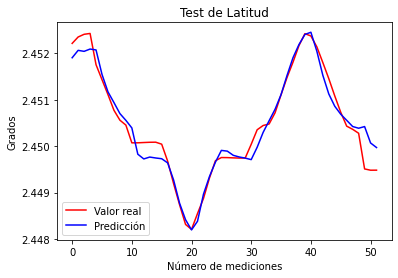

In [499]:
# Graficar resultados
graficar_predicciones(array_latitud,array_latitud_p,'Test de Latitud')

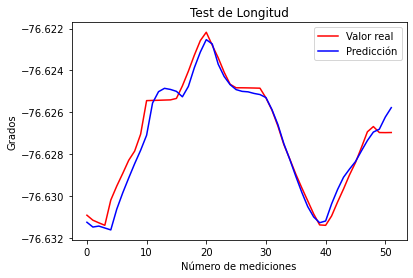

In [500]:
graficar_predicciones(array_longitud,array_longitud_p, 'Test de Longitud')

In [501]:
from sklearn.metrics import mean_squared_error

In [502]:
mse_lat = mean_squared_error(array_latitud[time_step:],array_latitud_p, squared=False)

In [503]:
mse_lat

0.0002520683575210197

In [504]:
mse_lon = mean_squared_error(array_longitud[time_step:],array_longitud_p, squared=False)

In [505]:
mse_lon

0.0005399494462767748

In [506]:
haversine(0.00000,0.00000,mse_lat,mse_lon)

0.06627852204716086

In [507]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
#x_test_n son las 4 columnas/variables del set de validacion
X_pred = x_test_n.copy()
for i in range(time_step,len(X_pred)):
    xin = (np.column_stack((X_pred[i-time_step:i,0:2],x_test_n[i-time_step:i,2:3],x_test_n[i-time_step:i,3:4]))).reshape(1, time_step, 4)
    #xin.reshape(1, time_step, 4)
    #xin = X_pred[i-time_step:i,0:2].reshape(1, time_step, 4)
    X_pred[i] = modelo.predict(xin)

1/1 [==============================] - 0s 12ms/step


In [508]:
 len(X_pred)

82

In [509]:
X_pred

array([[ 0.87705013,  0.10923381,  0.17056792,  0.61644123],
       [ 0.96763987,  0.03695467,  0.36070606,  0.50422652],
       [ 0.966593  ,  0.01033176,  0.38066002,  0.59319524],
       [ 0.88512272,  0.08518035,  0.58326939,  0.60333895],
       [ 0.82894033,  0.13532771,  0.43668458,  0.58199491],
       [ 0.74083983,  0.21419241,  0.605142  ,  0.53043109],
       [ 0.66067233,  0.28226111,  0.34113585,  0.53043109],
       [ 0.56808189,  0.36875857,  0.96815043,  0.59868975],
       [ 0.5274398 ,  0.4545327 ,  0.65138144,  0.49133557],
       [ 0.52515994,  0.53791011,  0.5821182 ,  0.54015214],
       [ 0.48005118,  0.62539001,  1.        ,  0.61749787],
       [ 0.42065837,  0.67348613,  0.22256332,  0.68977174],
       [ 0.33611725,  0.73658868,  0.60571759,  0.46956888],
       [ 0.2439223 ,  0.80097596,  0.17824252,  0.51923075],
       [ 0.14439921,  0.87846956,  0.56197239,  0.54945053],
       [ 0.05569385,  0.9421443 ,  0.39543362,  0.61728654],
       [ 0.00604862,  0.

In [510]:
xin.shape

(1, 30, 4)

In [511]:
prediccion2 = sc1.inverse_transform(X_pred)

In [512]:
# Funciones auxiliares
def graficar_predicciones2(real, prediccion,campo,title):
    plt.plot(real[0:len(real)], color='red', label='Valor real')
    plt.plot(prediccion, color='blue', label='Predicción')
    #plt.ylim(-44,-43)
    plt.title(title)
    plt.xlabel('Numero de mediciones')
    plt.ylabel(campo)
    plt.legend()
    plt.show()

In [513]:
prediccion2

array([[ 2.45190910e+00, -7.66304280e+01, -6.00064010e+00,
         4.50961870e+00],
       [ 2.45229850e+00, -7.66310975e+01, -3.62717580e+00,
        -3.59725140e+00],
       [ 2.45229400e+00, -7.66313441e+01, -3.37809370e+00,
         2.83022920e+00],
       [ 2.45194380e+00, -7.66306508e+01, -8.48953000e-01,
         3.56305360e+00],
       [ 2.45170230e+00, -7.66301863e+01, -2.67874800e+00,
         2.02106900e+00],
       [ 2.45132360e+00, -7.66294558e+01, -5.75920700e-01,
        -1.70412170e+00],
       [ 2.45097900e+00, -7.66288253e+01, -3.87146770e+00,
        -1.70412170e+00],
       [ 2.45058100e+00, -7.66280241e+01,  3.95545600e+00,
         3.22717590e+00],
       [ 2.45040630e+00, -7.66272296e+01,  1.27890000e-03,
        -4.52854910e+00],
       [ 2.45039650e+00, -7.66264573e+01, -8.63323100e-01,
        -1.00183160e+00],
       [ 2.45020260e+00, -7.66256470e+01,  4.35302920e+00,
         4.58595460e+00],
       [ 2.44994730e+00, -7.66252015e+01, -5.35158980e+00,
      

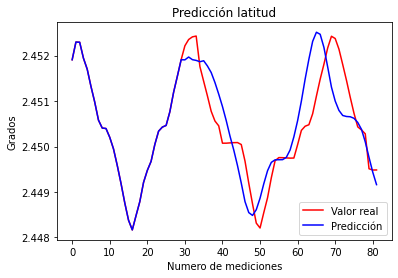

In [514]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones2(array_latitud,prediccion2[:,0:1],'Grados','Predicción latitud')

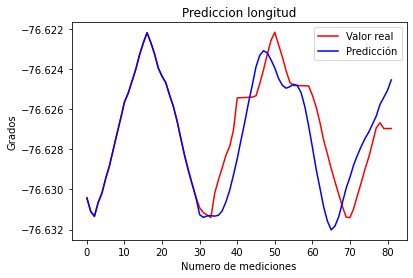

In [515]:
graficar_predicciones2(array_longitud,prediccion2[:,1:2],'Grados','Prediccion longitud')

In [516]:
mse_lat_p = mean_squared_error(array_latitud[time_step:],prediccion2[time_step:,0:1], squared=False)

In [517]:
mse_lat_p

0.0006948539663320305

In [518]:
mse_lon_p = mean_squared_error(array_longitud[time_step:],prediccion2[time_step:,1:2], squared=False)

In [519]:
mse_lon_p

0.0017572648191363789

In [520]:
haversine(0.00000,0.00000,mse_lat_p,mse_lon_p)

0.21017943179248205

In [521]:
calle_5_p = pd.DataFrame(prediccion2[:,0:2])

In [522]:
calle_5_p.to_csv('calle_5_p.csv')

In [523]:
distancia_entrenamiento = []
distancia_entrenamiento.append(0)
for i in range(0, len(set_entrenamiento)-1):
    distancia_entrenamiento.append(haversine(set_entrenamiento.iat[i,4],set_entrenamiento.iat[i,5],set_entrenamiento.iat[i+1,4],set_entrenamiento.iat[i+1,5]))

In [524]:
d_d_e = pd.DataFrame(distancia_entrenamiento, columns=['distancia'])
d_d_e

,distancia
0,0.000000
1,0.003521
2,0.009854
3,0.002167
4,0.000555
...,...
205,0.096939
206,0.099985
207,0.094909
208,0.084733


In [525]:
len(distancia_entrenamiento)

210

In [526]:
distancia_validacion = []
distancia_validacion.append(0)
for i in range(0, len(set_validacion)-1):
    distancia_validacion.append(haversine(set_validacion.iat[i,4],set_validacion.iat[i,5],set_validacion.iat[i+1,4],set_validacion.iat[i+1,5]))

In [527]:
d_d_v = pd.DataFrame(distancia_validacion, columns=['distancia'])
d_d_v

,distancia
0,0.000000
1,0.086087
2,0.027408
3,0.086329
4,0.058188
...,...
77,0.083498
78,0.029349
79,0.091244
80,0.003085


In [528]:
time_entrenamiento = set_entrenamiento['hour']
time_entrenamiento.head(10)

0   0 days 13:47:22
1   0 days 13:47:33
2   0 days 13:47:43
3   0 days 13:47:54
4   0 days 13:48:06
5   0 days 13:48:18
6   0 days 13:48:30
7   0 days 13:48:41
8   0 days 13:48:52
9   0 days 13:49:04
Name: hour, dtype: timedelta64[ns]

In [529]:
time_validacion = set_validacion['hour']
time_validacion

0    0 days 14:21:28
1    0 days 14:21:39
2    0 days 14:21:50
3    0 days 14:22:01
4    0 days 14:22:10
           ...      
77   0 days 14:36:37
78   0 days 14:36:48
79   0 days 14:37:26
80   0 days 14:37:38
81   0 days 14:37:49
Name: hour, Length: 82, dtype: timedelta64[ns]

In [530]:
data = pd.read_csv('LoRaWAN_messages_calle_5.csv')

In [531]:
data

,id,dev_id,date,hour,latitude,longitude,speed,accx,accy,accz,gyrox,gyroy,gyroz,SF,BW,CR
0,1,tarjeta2-cubecell,2022-08-01,10:46:18.000000,0.00000,0.0000,0.00000,0.028505,-0.020793,9.844550,0.162168,0.039022,-0.121008,7,125000,4/5
1,2,tarjeta2-cubecell,2022-08-01,10:46:28.000000,0.00000,0.0000,0.00000,0.035691,0.005552,9.803835,-0.005771,0.115358,-0.136275,7,125000,4/5
2,3,tarjeta2-cubecell,2022-08-01,10:46:40.000000,0.00000,0.0000,0.00000,-0.021790,-0.056719,9.715219,0.009496,-0.480061,0.230137,7,125000,4/5
3,4,tarjeta2-cubecell,2022-08-01,10:46:51.000000,0.00000,0.0000,0.00000,-0.057715,0.012737,9.842155,0.070565,-0.189985,0.031664,7,125000,4/5
4,5,tarjeta2-cubecell,2022-08-01,10:47:03.000000,0.00000,0.0000,0.00000,0.078801,-0.035164,9.815810,0.223237,-0.220519,-0.075206,7,125000,4/5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,305,tarjeta2-cubecell,2022-08-01,11:41:05.000000,2.45109,-76.6291,32.91004,-1.039673,-2.729561,9.624209,-1.456152,-1.228153,-1.098107,7,125000,4/5
305,306,tarjeta2-cubecell,2022-08-01,11:41:16.000000,2.45067,-76.6283,36.53996,-9.462957,10.840620,9.435002,-1.837832,3.061923,-2.502687,7,125000,4/5
306,307,tarjeta2-cubecell,2022-08-01,11:41:27.000000,2.45013,-76.6267,24.94644,0.071616,-3.347476,8.848222,4.436977,-0.602199,-0.777497,8,125000,4/5
307,308,tarjeta2-cubecell,2022-08-01,11:41:38.000000,2.44947,-76.6270,18.09404,-2.644336,-1.031492,12.479071,10.116367,12.329100,41.604183,7,125000,4/5


In [532]:
#data.drop(['hour'], axis=1, inplace=True)

In [533]:
import random
xi=[random.randint(9,14) for p in range (0,309)]
len(xi)

309

In [534]:
xi[0]

10

In [535]:
hora = time_validacion[9:10,]
hora

9   0 days 14:23:06
Name: hour, dtype: timedelta64[ns]

In [536]:
hora = time_validacion[9:10,]
hora2 = []*400
for i in range(0,len(xi)):
    h = (hora + timedelta(seconds=xi[i]))
    hora2.append(h)
    hora = hora2[i]

In [537]:
hora2

[9   0 days 14:23:16
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:29
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:39
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:23:53
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:04
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:18
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:31
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:40
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:24:53
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:02
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:11
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:23
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:36
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:25:50
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:26:02
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:26:15
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14:26:26
 Name: hour, dtype: timedelta64[ns],
 9   0 days 14

In [538]:
hora3 = pd.DataFrame(hora2)

In [539]:
hora3

,9
hour,0 days 14:23:16
hour,0 days 14:23:29
hour,0 days 14:23:39
hour,0 days 14:23:53
hour,0 days 14:24:04
...,...
hour,0 days 15:22:00
hour,0 days 15:22:10
hour,0 days 15:22:23
hour,0 days 15:22:32


In [540]:
data['hour'] = hora2

In [541]:
data.to_csv('dcalle5.csv')

In [542]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_entrenamiento = []
for i in range(0,len(time_entrenamiento)-1):
    medida_de_tiempo_entrenamiento.append(time_entrenamiento[i+1]-time_entrenamiento[i])
medida_de_tiempo_entrenamiento

[Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedel

In [543]:
min(medida_de_tiempo_entrenamiento)

Timedelta('0 days 00:00:09')

In [544]:
h = datetime.now()
h.hour

16

In [545]:
h

datetime.datetime(2022, 9, 23, 16, 32, 6, 855855)

In [546]:
h.minute

32

In [547]:

t = timedelta(
    days=0,
    seconds=h.second,
    microseconds=0,
    milliseconds=0,
    minutes=h.minute,
    hours=h.hour,
    weeks=0 )

In [548]:
t

datetime.timedelta(seconds=59526)

In [549]:
#Calcula la diferencia de tiempo entre puntos de ubicacion
medida_de_tiempo_validacion = []
for i in range(0,len(time_validacion)-1):
    medida_de_tiempo_validacion.append(time_validacion[i+1]-time_validacion[i])
medida_de_tiempo_validacion

[Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:09'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:12'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:10'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedelta('0 days 00:00:11'),
 Timedel

In [550]:
len(medida_de_tiempo_validacion)

81

In [551]:
#Creamos un objeto deltatime de valor 1 segundo
#Al dividir deltatime / deltatime se obtiene un valor de tipo float
#Al dividir sobre un segundo se obtiene un valor de tiempo en segundos
delta = timedelta(
    days=0,
    seconds=1,
    microseconds=0,
    milliseconds=0,
    minutes=0,
    hours=0,
    weeks=0 )

In [552]:
duracion_entrenamiento = []
duracion_entrenamiento.append(10)
for i in range(0,len(medida_de_tiempo_entrenamiento)):
    duracion_entrenamiento.append(medida_de_tiempo_entrenamiento[i]/delta)
duracion_entrenamiento

[10,
 11.0,
 10.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 10.0,
 12.0,
 11.0,
 11.0,
 17.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 12.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 10.0,
 12.0,
 12.0,
 10.0,
 12.0,
 10.0,
 12.0,
 11.0,
 11.0,
 10.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 10.0,
 20.0,
 9.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 12.0,
 11.0,
 12.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 17.0,
 1

In [553]:
#index = duracion_entrenamiento.index(1)
#index

In [554]:
len(duracion_entrenamiento)

210

In [555]:
n_e= np.column_stack((duracion_entrenamiento,distancia_entrenamiento))

In [556]:
n_e

array([[1.00000000e+01, 0.00000000e+00],
       [1.10000000e+01, 3.52067719e-03],
       [1.00000000e+01, 9.85380570e-03],
       [1.10000000e+01, 2.16718747e-03],
       [1.20000000e+01, 5.55203868e-04],
       [1.20000000e+01, 1.25120651e-03],
       [1.20000000e+01, 6.69329072e-04],
       [1.10000000e+01, 6.48119365e-05],
       [1.10000000e+01, 7.03392409e-05],
       [1.20000000e+01, 6.51871708e-03],
       [1.10000000e+01, 3.98069461e-02],
       [1.10000000e+01, 5.45180044e-02],
       [1.10000000e+01, 6.73082498e-02],
       [1.20000000e+01, 7.75697757e-02],
       [1.10000000e+01, 7.64685913e-03],
       [1.10000000e+01, 2.94999778e-03],
       [1.10000000e+01, 1.05641391e-03],
       [1.10000000e+01, 1.38127297e-03],
       [1.20000000e+01, 4.77558829e-02],
       [1.10000000e+01, 9.35895732e-02],
       [1.20000000e+01, 9.32792704e-02],
       [1.10000000e+01, 1.02441010e-01],
       [1.10000000e+01, 6.19675076e-02],
       [1.20000000e+01, 3.04297763e-02],
       [1.100000

In [557]:
duracion_validacion = []
duracion_validacion.append(10)
for i in range(0,len(medida_de_tiempo_validacion)):
    duracion_validacion.append(medida_de_tiempo_validacion[i]/delta)
duracion_validacion

[10,
 11.0,
 11.0,
 11.0,
 9.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 11.0,
 12.0,
 11.0,
 10.0,
 12.0,
 12.0,
 11.0,
 11.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 37.0,
 10.0,
 12.0,
 11.0,
 12.0,
 11.0,
 39.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 12.0,
 12.0,
 11.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 11.0,
 12.0,
 12.0,
 10.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 10.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 11.0,
 12.0,
 10.0,
 11.0,
 11.0,
 11.0,
 12.0,
 11.0,
 38.0,
 12.0,
 11.0]

In [558]:
#index = duracion_validacion.index(20)
#len(duracion_validacion)-index-309+5

In [559]:
n_v= np.column_stack((duracion_validacion,distancia_validacion))

In [560]:
n_v

array([[1.00000000e+01, 0.00000000e+00],
       [1.10000000e+01, 8.60866944e-02],
       [1.10000000e+01, 2.74078481e-02],
       [1.10000000e+01, 8.63294285e-02],
       [9.00000000e+00, 5.81882028e-02],
       [1.10000000e+01, 9.14539382e-02],
       [1.10000000e+01, 7.98626492e-02],
       [1.10000000e+01, 9.94310341e-02],
       [1.20000000e+01, 9.04014608e-02],
       [1.10000000e+01, 8.58284189e-02],
       [1.10000000e+01, 9.25909840e-02],
       [1.10000000e+01, 5.70717168e-02],
       [1.10000000e+01, 7.65019733e-02],
       [1.10000000e+01, 7.95945743e-02],
       [1.10000000e+01, 9.28795212e-02],
       [1.10000000e+01, 7.80661641e-02],
       [1.10000000e+01, 6.19561822e-02],
       [1.10000000e+01, 6.45097536e-02],
       [1.20000000e+01, 7.17685705e-02],
       [1.20000000e+01, 9.18232712e-02],
       [1.10000000e+01, 5.39132804e-02],
       [1.10000000e+01, 4.22885782e-02],
       [1.20000000e+01, 7.97240326e-02],
       [1.10000000e+01, 7.02299168e-02],
       [1.000000

In [561]:
duracion_data_entrenamiento = pd.DataFrame(duracion_entrenamiento, columns=['duracion'])
duracion_data_entrenamiento

,duracion
0,10.0
1,11.0
2,10.0
3,11.0
4,12.0
...,...
205,12.0
206,12.0
207,11.0
208,11.0


In [562]:
duracion_data_validacion = pd.DataFrame(duracion_validacion, columns=['duracion'])
duracion_data_validacion

,duracion
0,10.0
1,11.0
2,11.0
3,11.0
4,9.0
...,...
77,12.0
78,11.0
79,38.0
80,12.0


In [563]:
#normalizamos
sc = MinMaxScaler(feature_range=(0,1))
time_entrenamiento_escalado = sc.fit_transform(n_e)

In [564]:
#normalizamos
#sc2 = MinMaxScaler(feature_range=(0,1))
#time_validacion_escalado = sc2.transform(duracion_data_validacion)

In [565]:
# La red LSTM tendrá como entrada "time_step" datos consecutivos, y como salida 1 dato (la predicción a
# partir de esos "time_step" datos). Se conformará de esta forma el set de entrenamiento
time_step_t = 30
X_train_duracion = []
Y_train_duracion = []
n = len(n_e)

In [566]:
for i in range(time_step,n):
    # X: bloques de "time_step" datos: 0-time_step, 1-time_step+1, 2-time_step+2, etc
    X_train_duracion.append(time_entrenamiento_escalado[i-time_step:i,0:2])
    # Y: el siguiente dato
    Y_train_duracion.append(time_entrenamiento_escalado[i,0:2])

In [567]:
X_train_duracion, Y_train_duracion = np.array(X_train_duracion), np.array(Y_train_duracion)

In [568]:
# Reshape X_train para que se ajuste al modelo en Keras
X_train_duracion = np.reshape(X_train_duracion, (X_train_duracion.shape[0], X_train_duracion.shape[1], 2))

In [569]:
# Red LSTM
#Para crear la red debemos primero definir el tamaño de los datos de entrada y del dato de salida,
#así como el número total de neuronas (50):
dim_entrada_duracion = (X_train_duracion.shape[1],2)
dim_salida_duracion = 2
na_duracion = 100

In [570]:
#Cear un contenedor usando el módulo Sequential:
modelo_duracion = Sequential()
#añadimos el modelo
modelo_duracion.add(LSTM(units=na_duracion, return_sequences=True, input_shape=dim_entrada_duracion))
#agregamos una capa lSTM
modelo_duracion.add(LSTM(units=na_duracion))
#evitamos el sobreentrtenamiento con dropout
modelo_duracion.add(Dropout(0.2))
#Dense para la capa de salida
modelo_duracion.add(Dense(units=dim_salida_duracion))

In [571]:
#definimos funcion de error y el método para minimizar
modelo_duracion.compile(optimizer='rmsprop', loss='mse')

In [572]:
#implementamos el modelo con 20 iteraciones, epochs
#Presentando a la res lstm lotess de 32 datos
modelo_duracion.fit(X_train_duracion,Y_train_duracion,epochs=100,batch_size=32)

Epoch 1/100
6/6 [==============================] - 3s 20ms/step - loss: 0.0817
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0328
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0336
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0330
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0350
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0324
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0316
Epoch 8/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0313
Epoch 9/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0329
Epoch 10/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0314
Epoch 11/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0308
Epoch 12/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0317
Epoch 13/100
6/6 [==============================]

In [573]:
x_test = duracion_data_validacion.values
x_test

array([[10.],
       [11.],
       [11.],
       [11.],
       [ 9.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [11.],
       [12.],
       [11.],
       [10.],
       [12.],
       [12.],
       [11.],
       [11.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [37.],
       [10.],
       [12.],
       [11.],
       [12.],
       [11.],
       [39.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [12.],
       [12.],
       [10.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [10.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
      

In [574]:
x_test = sc.transform(n_v)
x_test

array([[9.09090909e-02, 0.00000000e+00],
       [1.81818182e-01, 5.82400704e-01],
       [1.81818182e-01, 1.85421802e-01],
       [1.81818182e-01, 5.84042869e-01],
       [0.00000000e+00, 3.93659560e-01],
       [1.81818182e-01, 6.18711619e-01],
       [1.81818182e-01, 5.40293288e-01],
       [1.81818182e-01, 6.72678916e-01],
       [2.72727273e-01, 6.11591313e-01],
       [1.81818182e-01, 5.80653398e-01],
       [1.81818182e-01, 6.26404053e-01],
       [1.81818182e-01, 3.86106219e-01],
       [1.81818182e-01, 5.17557370e-01],
       [1.81818182e-01, 5.38479685e-01],
       [1.81818182e-01, 6.28356088e-01],
       [1.81818182e-01, 5.28139561e-01],
       [1.81818182e-01, 4.19151001e-01],
       [1.81818182e-01, 4.36426630e-01],
       [2.72727273e-01, 4.85534569e-01],
       [2.72727273e-01, 6.21210260e-01],
       [1.81818182e-01, 3.64738508e-01],
       [1.81818182e-01, 2.86094128e-01],
       [2.72727273e-01, 5.39355507e-01],
       [1.81818182e-01, 4.75125144e-01],
       [9.090909

In [575]:
#Obtenemos bloques de 60 datos
X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0:2])

In [576]:
X_test = np.array(X_test)
X_test.shape

(52, 30, 2)

In [577]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],2))

In [578]:
#Predecimos y normalizamos
prediccion_tiempo = modelo_duracion.predict(X_test)
prediccion_tiempo = sc.inverse_transform(prediccion_tiempo)
prediccion_tiempo.shape

2/2 [==============================] - 1s 7ms/step


(52, 2)

In [579]:
prediccion_tiempo

array([[1.15012627e+01, 7.53552988e-02],
       [1.15239477e+01, 7.27283880e-02],
       [1.14994593e+01, 5.23797758e-02],
       [1.14722919e+01, 3.87477018e-02],
       [1.13993940e+01, 3.84174064e-02],
       [7.85498524e+00, 1.77996114e-01],
       [8.85077667e+00, 3.45661789e-02],
       [9.01130295e+00, 8.55746567e-02],
       [1.05909214e+01, 1.48135185e-01],
       [1.20359697e+01, 1.40363172e-01],
       [1.30779696e+01, 1.31687447e-01],
       [1.10501518e+01, 1.89319834e-01],
       [1.07502832e+01, 1.85076408e-02],
       [1.11697569e+01, 1.87061913e-02],
       [1.19623909e+01, 6.24010451e-02],
       [1.26657915e+01, 7.68709555e-02],
       [1.29496088e+01, 6.35785088e-02],
       [1.28350754e+01, 6.76668957e-02],
       [1.23269320e+01, 5.40445298e-02],
       [1.18949366e+01, 3.46457288e-02],
       [1.14383011e+01, 2.42358930e-02],
       [1.12272549e+01, 2.14658771e-03],
       [1.09042587e+01, 4.49956879e-02],
       [1.07801914e+01, 7.95350000e-02],
       [1.087427

In [580]:
# Funciones auxiliares
def graficar_predicciones3(real, prediccion,campo):
    plt.plot(real[0:len(prediccion)], 'o',   color='red', label='Valor real')
    plt.plot(prediccion,'o', color='blue', label='Predicción')
    plt.ylim(9,15)
    #plt.xlim(40,50)
    plt.xlabel('Número de mediciones')
    plt.ylabel(campo)
    plt.title('Predicción de tiempo entre mediciones')
    plt.legend()
    plt.show()

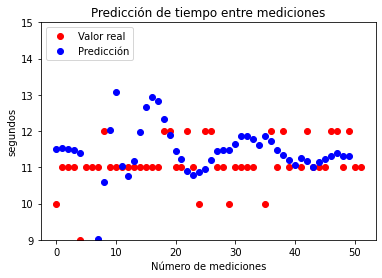

In [581]:
# Graficar resultados
graficar_predicciones3(n_v[:,0:1],prediccion_tiempo[:,0:1],'segundos')

In [582]:
n_v_t = sc.transform(n_v)

In [583]:
#Prediccion con los primeros datos del set de validacion
# Using predicted values to predict next step
X_pred_t = n_v_t.copy()
for i in range(time_step_t,len(X_pred_t)):
    xin_t = X_pred_t[i-time_step_t:i].reshape(1, time_step_t, 2)
    X_pred_t[i] = modelo_duracion.predict(xin_t)

1/1 [==============================] - 0s 13ms/step


In [584]:
X_pred_t

array([[0.09090909, 0.        ],
       [0.18181818, 0.5824007 ],
       [0.18181818, 0.1854218 ],
       [0.18181818, 0.58404287],
       [0.        , 0.39365956],
       [0.18181818, 0.61871162],
       [0.18181818, 0.54029329],
       [0.18181818, 0.67267892],
       [0.27272727, 0.61159131],
       [0.18181818, 0.5806534 ],
       [0.18181818, 0.62640405],
       [0.18181818, 0.38610622],
       [0.18181818, 0.51755737],
       [0.18181818, 0.53847969],
       [0.18181818, 0.62835609],
       [0.18181818, 0.52813956],
       [0.18181818, 0.419151  ],
       [0.18181818, 0.43642663],
       [0.27272727, 0.48553457],
       [0.27272727, 0.62121026],
       [0.18181818, 0.36473851],
       [0.18181818, 0.28609413],
       [0.27272727, 0.53935551],
       [0.18181818, 0.47512514],
       [0.09090909, 0.55400404],
       [0.27272727, 0.65582201],
       [0.27272727, 0.67642895],
       [0.18181818, 0.6420874 ],
       [0.18181818, 0.57323942],
       [0.09090909, 0.56611059],
       [0.

In [585]:
prediccion2 = sc.inverse_transform(X_pred_t)

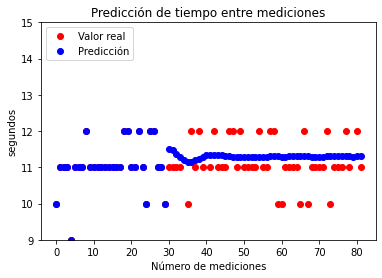

In [586]:
# Graficar resultados de prediccion de valores futuros
graficar_predicciones3(n_v[:,0:1],prediccion2[:,0:1],'segundos')

In [587]:
mse_t = mean_squared_error(n_v[time_step_t:,0:1] ,prediccion2[time_step_t:,0:1], squared=False)

In [588]:
mse_t

6.4501027743564014

In [589]:
n_v[time_step_t:,0:1]

array([[11.],
       [11.],
       [11.],
       [11.],
       [37.],
       [10.],
       [12.],
       [11.],
       [12.],
       [11.],
       [39.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [12.],
       [12.],
       [11.],
       [12.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [11.],
       [12.],
       [12.],
       [10.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [10.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
       [11.],
       [12.],
       [10.],
       [11.],
       [11.],
       [11.],
       [12.],
       [11.],
       [38.],
       [12.],
       [11.]])

In [590]:
prediccion2[time_step_t:,0:1]

array([[11.50126188],
       [11.47253682],
       [11.37933733],
       [11.28102244],
       [11.20673439],
       [11.15326326],
       [11.15929344],
       [11.19469418],
       [11.24270865],
       [11.29744437],
       [11.32797559],
       [11.34176491],
       [11.34489827],
       [11.33877924],
       [11.32801034],
       [11.31476635],
       [11.30191165],
       [11.29153302],
       [11.28455788],
       [11.2903676 ],
       [11.29529335],
       [11.291435  ],
       [11.29027221],
       [11.29854243],
       [11.29625699],
       [11.28559741],
       [11.29654843],
       [11.30552118],
       [11.30204032],
       [11.29876256],
       [11.28714508],
       [11.29404204],
       [11.30017729],
       [11.30357143],
       [11.30424266],
       [11.3030615 ],
       [11.30094817],
       [11.29904383],
       [11.29785842],
       [11.29746699],
       [11.29773958],
       [11.29822345],
       [11.29865634],
       [11.29894024],
       [11.29904908],
       [11